
# Analyzing Historical Stock/Revenue Data and Building a Dashboard

-------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
!pip install yfinance
!pip install matplotlib
!pip install plotly

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------------ --- 7.3/8.0 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 33.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 50.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   --------------------- ------------------ 8.1/14.8 MB 42.1 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 38.8 MB/s eta 0:00:00


In [21]:
!pip install openpyxl
!pip install bs4

In [76]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [70]:
teslaObject = yf.Ticker('TSLA')
tesla_data = teslaObject.history(period='max')
tesla_data = tesla_data.reset_index()

In [71]:
# Eliminamos el timezone para que sea compatible con excel
tesla_data['Date'] = tesla_data['Date'].dt.tz_localize(None)
tesla_data.to_excel(r'C:\Users\david\Desktop\Cursos\DataAnalistIBM\tesla_data.xlsx', index=False)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [35]:
url = "https://finance.yahoo.com/quote/TSLA/history/"
headers = {"User-Agent": "Mozilla/5.0"}
tslaData = requests.get(url, headers=headers)
bsTslaData = BeautifulSoup(tslaData.text, 'html.parser')

In [52]:
table = bsTslaData.find('table')
headers = [header.text for header in table.find_all('th')]
rows = []
for row in table.find('tbody').find_all('tr'):
    cols = [col.text.strip() for col in row.find_all('td')]
    if cols:
        rows.append(cols)

df = pd.DataFrame(rows, columns=headers)
print(df.shape)
print("------------------------------------------------")
print(df.columns)
print("------------------------------------------------")
df.drop(df.columns[[4,5]], axis=1, inplace=True)
print(df.tail(5))

(250, 7)
------------------------------------------------
Index(['Date  ', 'Open  ', 'High  ', 'Low  ',
       'Close      Close price adjusted for splits.   ',
       'Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.   ',
       'Volume  '],
      dtype='object')
------------------------------------------------
           Date    Open    High     Low       Volume  
245  Feb 16, 2024  202.06  203.17  197.40  111,173,600
246  Feb 15, 2024  189.16  200.88  188.86  120,831,800
247  Feb 14, 2024  185.30  188.89  183.35   81,203,000
248  Feb 13, 2024  183.99  187.26  182.11   86,759,500
249  Feb 12, 2024  192.11  194.73  187.28   95,498,600


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [81]:
gameStop = yf.Ticker('GME')
gameStopData = gameStop.history(period="max")
gameStopData = gameStopData.reset_index()
gameStopData.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [64]:
url = "https://finance.yahoo.com/quote/GME/history/"
headers = {"User-Agent": "Mozilla/5.0"}
gme = requests.get(url, headers=headers)
bs = BeautifulSoup(gme.text, 'html.parser')
table = bs.find('table')
tHeaders = [tHeader.text.strip() for tHeader in table.find_all('th')]
rows = []
for row in table.find_all('tr'):
    cols = [col.text.strip() for col in row.find_all('td')]
    rows.append(cols)

df = pd.DataFrame(rows, columns=tHeaders)
df.tail(5)

,Date,Open,High,Low,Close Close price adjusted for splits.,Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.,Volume
246,"Feb 16, 2024",14.46,14.53,14.10,14.12,14.12,"2,297,200"
247,"Feb 15, 2024",14.54,14.75,14.23,14.51,14.51,"2,400,500"
248,"Feb 14, 2024",14.33,14.43,14.05,14.41,14.41,"2,504,400"
249,"Feb 13, 2024",14.20,14.40,13.77,14.17,14.17,"3,788,700"
250,"Feb 12, 2024",14.58,15.22,14.53,14.73,14.73,"2,750,100"


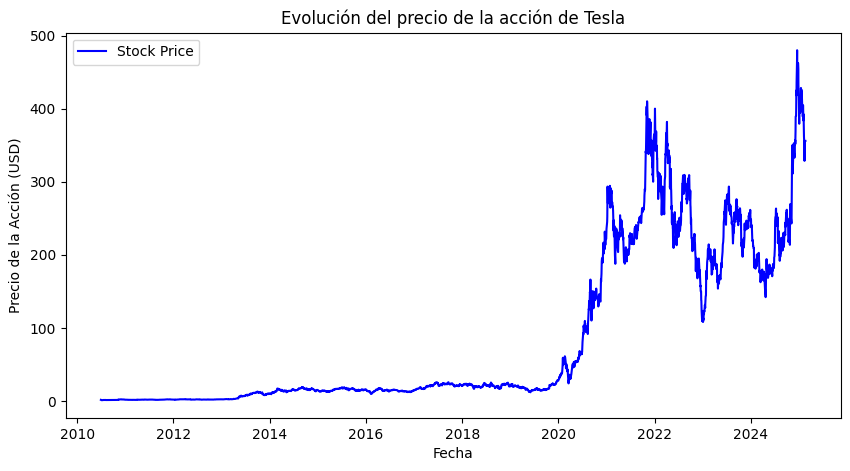

In [73]:
# Función para graficar los datos
def make_graph(stock_data, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Stock Price", color="blue")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de la Acción (USD)")
    plt.title(title)
    plt.legend()
    plt.show()

# Llamar a la función para graficar
make_graph(tesla_data, "Evolución del precio de la acción de Tesla")

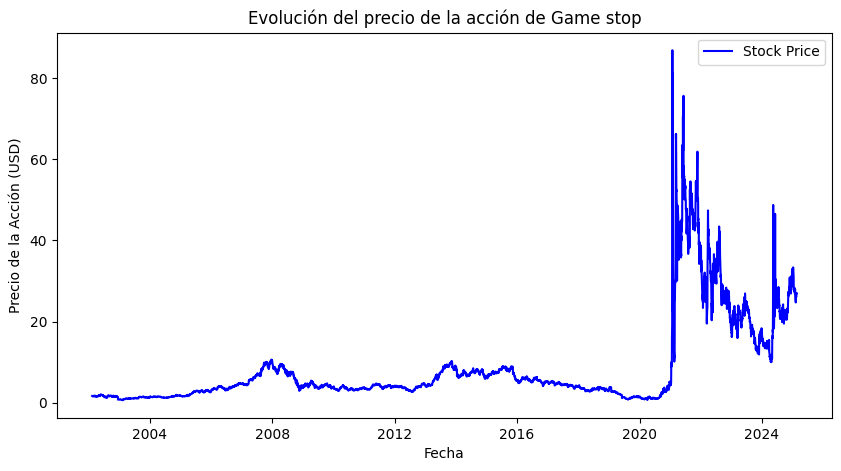

In [82]:
# Llamar a la función para graficar
make_graph(gameStopData, "Evolución del precio de la acción de Game stop")